# Partie 3 : Modele predictif de Machine Learning

Avant tout,  je vous invite vivement a lire la partie 2 qui traite du nettoyage de la base de données initiale et l'obtention du jeu de données que l'on utilise pour le (les) modele(s) de machine learning.

In [716]:
import pandas as pd
data = pd.read_csv('heart_disease_by_ceo.csv', index_col=0)


## KNN

On commence avec les "import" qui nous permettrons d'utiliser la methode de KNN (K-Nearest-Neighbors)

In [717]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

nb_colonnes = len(data.columns)
print("Nombre de colonnes : ", nb_colonnes)

Nombre de colonnes :  19


In [718]:
data

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,TA_ChestPain,ATA_ChestPain,NAP_ChestPain,ASY_ChestPain,Normal_RestingECG,ST_RestingECG,LVH_RestingECG,Up_ST_Slope,Flat_ST_Slope,Down_ST_Slope,HeartDisease
0,40,0,140,289,0,172,0,0.0,0,1,0,0,1,0,0,1,0,0,0
1,49,1,160,180,0,156,0,1.0,0,0,1,0,1,0,0,0,1,0,1
2,37,0,130,283,0,98,0,0.0,0,1,0,0,0,1,0,1,0,0,0
3,48,1,138,214,0,108,1,1.5,0,0,0,1,1,0,0,0,1,0,1
4,54,0,150,195,0,122,0,0.0,0,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,110,264,0,132,0,1.2,1,0,0,0,1,0,0,0,1,0,1
914,68,0,144,193,1,141,0,3.4,0,0,0,1,1,0,0,0,1,0,1
915,57,0,130,131,0,115,1,1.2,0,0,0,1,1,0,0,0,1,0,1
916,57,1,130,236,0,174,0,0.0,0,1,0,0,0,0,1,0,1,0,1


### Obtention et Nettoyage des données

Cette partie sert de rappel.

L'obtention et le nettoyage des données est réalisés dans la partie 2 du projet.

### Exploration des données.

A l'aide de Seaborn on va compter les valeurs dans le colonne "Heart Disease" de notre jeu de données.

In [719]:
data['HeartDisease'].value_counts()

HeartDisease
1    507
0    410
Name: count, dtype: int64

Puis nous allons les afficher à l'aide sns

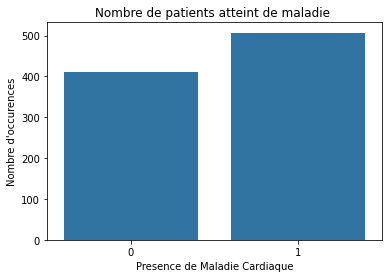

In [720]:
sns.countplot(x='HeartDisease', data=data)
plt.title('Nombre de patients atteint de maladie ')
plt.xlabel('Presence de Maladie Cardiaque')
plt.ylabel("Nombre d'occurences")
plt.show()



On va d'abord regarder explorer les la relation entre la presence d'une maladie cardiaque et :

## La frequence Cardiaque Maximale

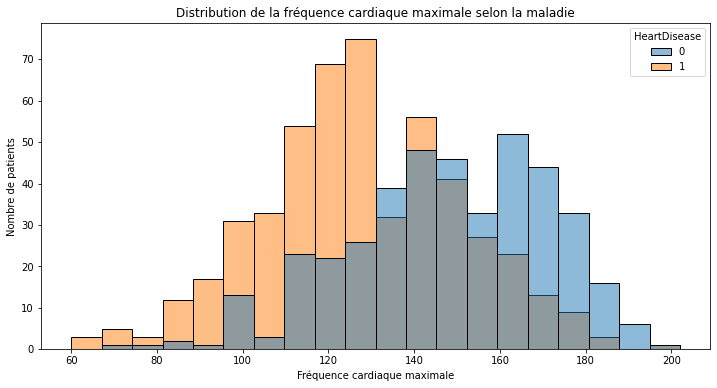

In [721]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='MaxHR', hue='HeartDisease', multiple="layer", alpha=0.5)
plt.title('Distribution de la fréquence cardiaque maximale selon la maladie')
plt.xlabel('Fréquence cardiaque maximale')
plt.ylabel('Nombre de patients')
plt.show()

## L'âge

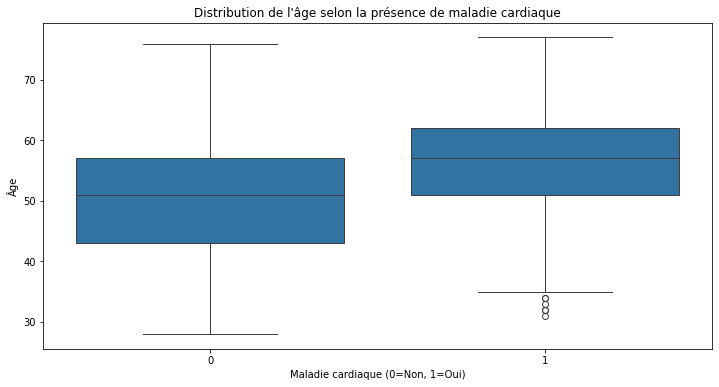

In [722]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='HeartDisease', y='Age', data=data)
plt.title('Distribution de l\'âge selon la présence de maladie cardiaque')
plt.xlabel('Maladie cardiaque (0=Non, 1=Oui)')
plt.ylabel('Âge')
plt.show()

## Le sexe 

<Figure size 720x432 with 0 Axes>

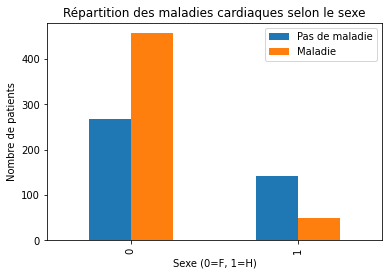

In [723]:
plt.figure(figsize=(10, 6))
pd.crosstab(data['Sex'], data['HeartDisease']).plot(kind='bar')
plt.title('Répartition des maladies cardiaques selon le sexe')
plt.xlabel('Sexe (0=F, 1=H)')
plt.ylabel('Nombre de patients')
plt.legend(['Pas de maladie', 'Maladie'])
plt.show()

On va ensuite creer un "heat map" permettant de mieux representer la correlation entre chaque colonnes.

<Axes: >

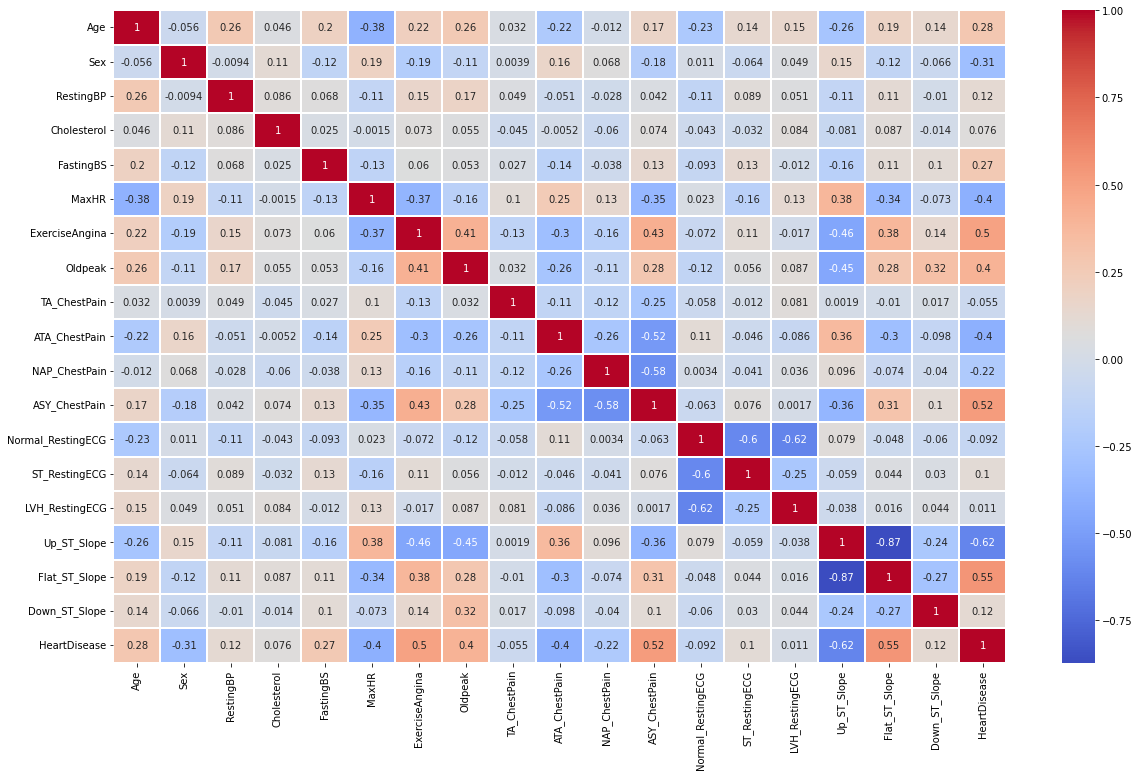

In [724]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=.1)

# Division des données

On va ensuite divise notre data frame en deux ensembles afin d'entrainer notre modeles.

D'abord assigner toutes les valeurs sauf Heart diseases.

In [725]:
x = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

Puis je vais diviser mes données de la maniere suivante : 

80 % des données pour l'entrainement.
20 % des données pour le test.

In [726]:
from sklearn.model_selection import train_test_split

In [727]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)   

# Standardisation des variables

Puis je vais standardiser mes variables à l'aide de de StandardScaler()

In [728]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# KNN (k-nearest neighbours)

A l'aide de ces données je vais pouvoir utiliser le modele KNN

In [729]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [730]:
predictions = knn.predict(x_test)

# Prediction et Evaluation du modèle

Je vais ensuite evaluez les performances de mon modeles KNN sur l'ensemble de Test et affichez la matrice de confusion sous forme de tableau puis de graphique et ensuite un rapport de classification.

In [731]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

## Matrice de confusion en tableau

In [732]:
print(confusion_matrix(y_test, predictions))

[[59 13]
 [29 83]]


## Matrice de confusion en graphique

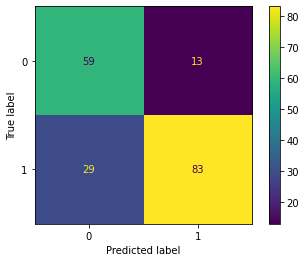

In [733]:
conf = ConfusionMatrixDisplay(confusion_matrix(y_test, predictions))
conf.plot()

Rapport de classification : F1-score, Precision, Recall et Support

In [734]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.82      0.74        72
           1       0.86      0.74      0.80       112

    accuracy                           0.77       184
   macro avg       0.77      0.78      0.77       184
weighted avg       0.79      0.77      0.77       184



# Choix de la valeur de K

On va utiliser la methode "Elbow" pour choisir la valeur de K. Donc nous allons entrainer plusieurs modeles avec des valeurs de K differentes et ensuite afficher les scores pour chaque valeur de K.

Puis on va afficher ces scores sous forme de graphique pour choisir la valeur de K.

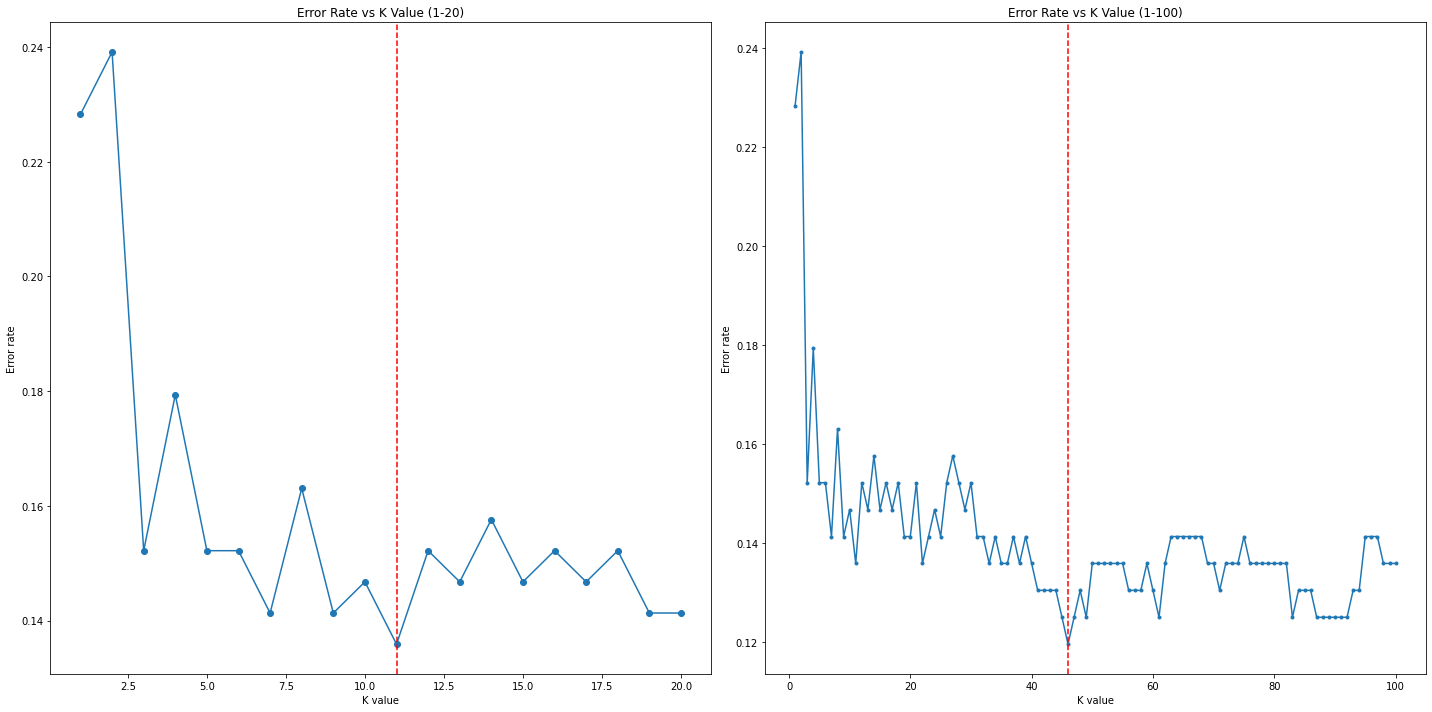

Meilleure valeur (1-20): 11 avec un taux d'erreur: 0.1359
Meilleure valeur (1-100): 46 avec un taux d'erreur: 0.1196


In [735]:
from sklearn.metrics import accuracy_score

# For K values from 1 to 20
erreur_20 = []
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    test_erreur = 1 - accuracy_score(y_test, pred_i)
    erreur_20.append(test_erreur)

# For K values from 1 to 100
erreur_100 = []
for i in range(1, 101):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    test_erreur = 1 - accuracy_score(y_test, pred_i)
    erreur_100.append(test_erreur)

# Plot results
plt.figure(figsize=(20, 10))

# Plot for K=1 to 20
plt.subplot(1, 2, 1)
plt.plot(range(1, 21), erreur_20, marker='o')
plt.xlabel('K value')
plt.ylabel('Error rate')
plt.title('Error Rate vs K Value (1-20)')
best_k_20 = np.argmin(erreur_20) + 1
plt.axvline(x=best_k_20, color='r', linestyle='--')

# Plot for K=1 to 100
plt.subplot(1, 2, 2)
plt.plot(range(1, 101), erreur_100, marker='.')
plt.xlabel('K value')
plt.ylabel('Error rate')
plt.title('Error Rate vs K Value (1-100)')
best_k_100 = np.argmin(erreur_100) + 1
plt.axvline(x=best_k_100, color='r', linestyle='--')

plt.tight_layout()
plt.show()

print(f"Meilleure valeur (1-20): {best_k_20} avec un taux d'erreur: {erreur_20[best_k_20-1]:.4f}")
print(f"Meilleure valeur (1-100): {best_k_100} avec un taux d'erreur: {erreur_100[best_k_100-1]:.4f}")

Le K avec le taux d'erreur le plus bas sera choisi.
on peut choisir K = 46 mais si on veut un K plus petit on peut choisir K = 11

ON va utiliser pour nos tests K= 11 et K = 46.

# Utilisation de la meilleur valeur de K

## K = 11

In [736]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

print("K=11")
print("\n")
print(confusion_matrix(y_test, pred))
print("\n")
print(classification_report(y_test, pred))

K=11


[[62 10]
 [15 97]]


              precision    recall  f1-score   support

           0       0.81      0.86      0.83        72
           1       0.91      0.87      0.89       112

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



### Test du modele avec K = 11

In [737]:
patient = [[40,0,140,289,0,172,0,0.0,0,1,0,0,1,0,0,1,0,0]] #1
patient2 = [[57,1,130,236,0,174,0,0.0,0,1,0,0,0,0,1,0,1,0]] #916
patient3 = [[57,0,130,131,0,115,1,1.2,0,0,0,1,1,0,0,0,1,0]] #915

patient = scaler.transform(patient)
patient2 = scaler.transform(patient2)
patient3 = scaler.transform(patient3)

print(knn.predict(patient))
print(knn.predict(patient2))
print(knn.predict(patient3))

[0]
[0]
[1]


In [738]:
#Probabilité d'être sain ou malade
#patient 1
print("\n")
print("Patient 1")
probabilites = knn.predict_proba(patient)
print(f"Probabilité d'être sain : {probabilites[0][0]*100:.2f}%")
print(f"Probabilité d'être malade : {probabilites[0][1]*100:.2f}%")

#patient 2
print("\n")
print("Patient 2")
probabilites = knn.predict_proba(patient2)
print(f"Probabilité d'être sain : {probabilites[0][0]*100:.2f}%")
print(f"Probabilité d'être malade : {probabilites[0][1]*100:.2f}%")

#patient 3
print("\n")
print("Patient 3")
probabilites = knn.predict_proba(patient3)
print(f"Probabilité d'être sain : {probabilites[0][0]*100:.2f}%")
print(f"Probabilité d'être malade : {probabilites[0][1]*100:.2f}%")



Patient 1


Probabilité d'être sain : 100.00%
Probabilité d'être malade : 0.00%


Patient 2
Probabilité d'être sain : 72.73%
Probabilité d'être malade : 27.27%


Patient 3
Probabilité d'être sain : 27.27%
Probabilité d'être malade : 72.73%


## K = 46

In [739]:
knn = KNeighborsClassifier(n_neighbors=46)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

print("K=46")
print("\n")
print(confusion_matrix(y_test, pred))
print("\n")
print(classification_report(y_test, pred))



K=46


[[65  7]
 [15 97]]


              precision    recall  f1-score   support

           0       0.81      0.90      0.86        72
           1       0.93      0.87      0.90       112

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.88       184
weighted avg       0.89      0.88      0.88       184



### Test du modele avec K = 45

In [740]:
patient = [[40,0,140,289,0,172,0,0.0,0,1,0,0,1,0,0,1,0,0]] #1
patient2 = [[57,1,130,236,0,174,0,0.0,0,1,0,0,0,0,1,0,1,0]] #916
patient3 = [[57,0,130,131,0,115,1,1.2,0,0,0,1,1,0,0,0,1,0]] #915

patient = scaler.transform(patient)
patient2 = scaler.transform(patient2)
patient3 = scaler.transform(patient3)

print(knn.predict(patient))
print(knn.predict(patient2))
print(knn.predict(patient3))

[0]


[0]
[1]


In [741]:
#Probabilité d'être sain ou malade

#patient 1
print("\n")
print("Patient 1")
probabilites = knn.predict_proba(patient)
print(f"Probabilité d'être sain : {probabilites[0][0]*100:.2f}%")
print(f"Probabilité d'être malade : {probabilites[0][1]*100:.2f}%")

#patient 2
print("\n")
print("Patient 2")
probabilites = knn.predict_proba(patient2)
print(f"Probabilité d'être sain : {probabilites[0][0]*100:.2f}%")
print(f"Probabilité d'être malade : {probabilites[0][1]*100:.2f}%")

#patient 3
print("\n")
print("Patient 3")
probabilites = knn.predict_proba(patient3)
print(f"Probabilité d'être sain : {probabilites[0][0]*100:.2f}%")
print(f"Probabilité d'être malade : {probabilites[0][1]*100:.2f}%")




Patient 1
Probabilité d'être sain : 100.00%
Probabilité d'être malade : 0.00%


Patient 2
Probabilité d'être sain : 73.91%
Probabilité d'être malade : 26.09%


Patient 3
Probabilité d'être sain : 10.87%
Probabilité d'être malade : 89.13%
